# Task 2 (Unsupervised Learning) - Characterizing Donors and Donation Type

In this task you should **use unsupervised learning algorithms and try to characterize donors (people who really did a donation) and their donation type**. You can use:
* **Association rule mining** to find **associations between the features and the target Donation/DonationTYPE**.
* **Clustering algorithms to find similar groups of donors**. Is it possible to find groups of donors with the same/similar DonationTYPE?
* **Be creative and define your own unsupervised analysis!** What would it be interesting to find out ?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cluster
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In Task 2.2 we were not able to find any groups in the data. However, we were interested in learning if by applying clustering algorithms to a subset of our dataset, we could improve performance and find specific groups. Thus, contructing the subset using variables that could more likely be related to either being a donor, or a particular donation type, could potentially help in the clustering task.
For example, financially speaking, even if a person is sensitized to donate, they will not if they do not possess the means to do so. On the other hand, we found in previous studies that the income of each individual had a strong impact in the likelihood of donating. Therefore, we decided to test the quality of the dataset using variables related to such conditions.

## Donors vs Not Donors

### Preprocessing Data for Clustering

In [2]:
df_clean = pd.read_csv('donors_dataset_clean.csv') 
df_clean.head()

,TARGET_B,TARGET_D,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,SES,CLUSTER_CODE,INCOME_GROUP,MOR_HIT_RATE,MEDIAN_HOME_VALUE,...,LIFETIME_GIFT_RANGE_BIN,LAST_GIFT_AMT_BIN,CARD_PROM_12_BIN,NUMBER_PROM_12_BIN,MONTHS_SINCE_LAST_GIFT_BIN,MONTHS_SINCE_FIRST_GIFT_BIN,FILE_CARD_GIFT_BIN,INCOME_GROUP_BIN,RECENCY_STATUS_96NK_e,DONATION_TYPE
0,1.0,10.0,137.0,79.000000,0.0,2.0,45.0,7.0,0.0,334.0,...,"(15.0, 30.0]","(15.0, 30.0]","(3.0, 9.0]","(20.0, 30.0]","(-0.1, 8.0]","(120.0, 260.0]","(10.0, 20.0]","(6.4, 8.337]",4.0,D
1,0.0,0.0,113.0,75.000000,0.0,1.0,11.0,5.0,0.0,2388.0,...,"(15.0, 30.0]","(15.0, 30.0]","(9.0, 14.0]","(30.0, 64.0]","(-0.1, 8.0]","(80.0, 120.0]","(10.0, 20.0]","(4.4, 5.4]",4.0,NaN
2,0.0,0.0,92.0,62.695162,0.0,2.0,4.0,6.0,0.0,1688.0,...,"(-0.1, 15.0]","(-0.1, 15.0]","(9.0, 14.0]","(30.0, 64.0]","(-0.1, 8.0]","(80.0, 120.0]","(10.0, 20.0]","(5.4, 6.4]",0.0,NaN
3,0.0,0.0,101.0,74.000000,0.0,2.0,49.0,2.0,8.0,514.0,...,"(15.0, 30.0]","(15.0, 30.0]","(3.0, 9.0]","(10.0, 20.0]","(16.0, 24.0]","(80.0, 120.0]","(-0.1, 10.0]","(1.4, 2.4]",0.0,NaN
4,0.0,0.0,101.0,63.000000,0.0,3.0,8.0,3.0,0.0,452.0,...,"(-0.1, 15.0]","(-0.1, 15.0]","(3.0, 9.0]","(10.0, 20.0]","(16.0, 24.0]","(80.0, 120.0]","(-0.1, 10.0]","(2.4, 3.4]",0.0,NaN


In [3]:
# Create the subset
df_targetb = df_clean[['SES', 'PER_CAPITA_INCOME', 'MEDIAN_HOUSEHOLD_INCOME', 'LAST_GIFT_AMT', 
                       'INCOME_GROUP', 'TARGET_B']]
df_targetb.head()

,SES,PER_CAPITA_INCOME,MEDIAN_HOUSEHOLD_INCOME,LAST_GIFT_AMT,INCOME_GROUP,TARGET_B
0,2.0,10385.0,212.0,17.0,7.0,1.0
1,1.0,30855.0,405.0,19.0,5.0,0.0
2,2.0,16342.0,153.0,15.0,6.0,0.0
3,2.0,12107.0,328.0,25.0,2.0,0.0
4,3.0,6851.0,182.0,10.0,3.0,0.0


In [4]:
# Data preparation: from dataframe to arrays
nc = df_targetb.shape[1] 
matrix = df_targetb.values 
X_targetb = matrix [:, 0:nc-1]
y_targetb = matrix [:, nc-1]       
features_targetb = df_targetb.columns.values[0:nc-1]
target_targetb = df_targetb.columns.values[nc-1]

### K-means Clustering

Homogeneity Score:  0.00411264170618574
V Measure Score:  0.0019094961597882715


Text(0.5, 1.0, 'Contingency Matrix - Donors vs. Not Donors')

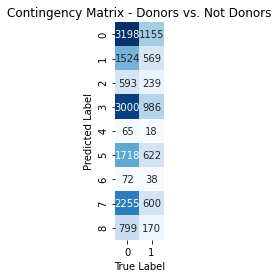

In [5]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(X_targetb)

# Perform K-Means
km = KMeans(n_clusters=9)
km = km.fit(X_std)
labels_targetb = km.predict(X_std)

# Scores
print('Homogeneity Score: ', homogeneity_score(y_targetb, labels_targetb))
print('V Measure Score: ', v_measure_score(y_targetb, labels_targetb))

# Contingency Matrix
cont_m = cluster.contingency_matrix(y_targetb, labels_targetb)

sns.heatmap(cont_m.T, square=True, annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label');
plt.title('Contingency Matrix - Donors vs. Not Donors')

### Hierarchical Clustering

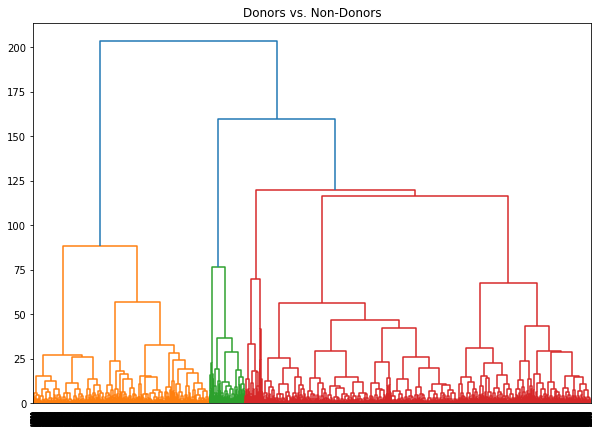

In [6]:
plt.figure(figsize=(10, 7))
plt.title('Donors vs. Non-Donors')
dend = shc.dendrogram(shc.linkage(X_std, method='ward'))

The number of clusters is calculated using the maximum traversing distance up and down without intersecting the merging points. The dendogram automatically gives the number of clusters, evidencing them by color (3 in our case).

In [7]:
# Perform Agglomerative Clustering
ag_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels_ac = ag_cluster.fit_predict(X_std)

Homogeneity Score:  0.0013106444680580768
V Measure Score:  0.001054016879936887


Text(0.5, 1.0, 'Contingency Matrix - Donors vs. Not Donors')

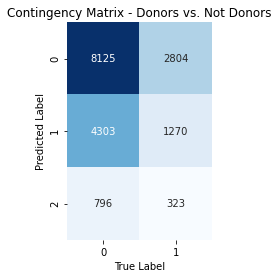

In [8]:
# Scores
print('Homogeneity Score: ', homogeneity_score(y_targetb, labels_ac))
print('V Measure Score: ', v_measure_score(y_targetb, labels_ac))

# Contingency Matrix
cont_m = cluster.contingency_matrix(y_targetb, labels_ac)

sns.heatmap(cont_m.T, square=True, annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label');
plt.title('Contingency Matrix - Donors vs. Not Donors')

### Results and Discussion 

K-Means Homogeneity Score is very low, showing the clusters contain data points that are members of several classes. Crossing homogeneity with completeness gives the V Measure Score, which is very low as well. This means there is no tendency to cluster the same class in the same cluster. Hierarchical Clustering presents similar results for Homogeneity Score and V Measure Score. With such small score values, for both K-means and Hierarchical Clustering, the way we calculate proximity might not even be the most relevant factor. The results of both models reveal little correlation between income variables and the propensity to donate. Since these variables usually have a big impact on such propensity, we believe our dataset needed further pre-processing. 

## Donation Type

### Preprocessing Data for Clustering

In [9]:
df_clean = pd.read_csv('donors_dataset_clean.csv') 
df_clean.head()

,TARGET_B,TARGET_D,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,SES,CLUSTER_CODE,INCOME_GROUP,MOR_HIT_RATE,MEDIAN_HOME_VALUE,...,LIFETIME_GIFT_RANGE_BIN,LAST_GIFT_AMT_BIN,CARD_PROM_12_BIN,NUMBER_PROM_12_BIN,MONTHS_SINCE_LAST_GIFT_BIN,MONTHS_SINCE_FIRST_GIFT_BIN,FILE_CARD_GIFT_BIN,INCOME_GROUP_BIN,RECENCY_STATUS_96NK_e,DONATION_TYPE
0,1.0,10.0,137.0,79.000000,0.0,2.0,45.0,7.0,0.0,334.0,...,"(15.0, 30.0]","(15.0, 30.0]","(3.0, 9.0]","(20.0, 30.0]","(-0.1, 8.0]","(120.0, 260.0]","(10.0, 20.0]","(6.4, 8.337]",4.0,D
1,0.0,0.0,113.0,75.000000,0.0,1.0,11.0,5.0,0.0,2388.0,...,"(15.0, 30.0]","(15.0, 30.0]","(9.0, 14.0]","(30.0, 64.0]","(-0.1, 8.0]","(80.0, 120.0]","(10.0, 20.0]","(4.4, 5.4]",4.0,NaN
2,0.0,0.0,92.0,62.695162,0.0,2.0,4.0,6.0,0.0,1688.0,...,"(-0.1, 15.0]","(-0.1, 15.0]","(9.0, 14.0]","(30.0, 64.0]","(-0.1, 8.0]","(80.0, 120.0]","(10.0, 20.0]","(5.4, 6.4]",0.0,NaN
3,0.0,0.0,101.0,74.000000,0.0,2.0,49.0,2.0,8.0,514.0,...,"(15.0, 30.0]","(15.0, 30.0]","(3.0, 9.0]","(10.0, 20.0]","(16.0, 24.0]","(80.0, 120.0]","(-0.1, 10.0]","(1.4, 2.4]",0.0,NaN
4,0.0,0.0,101.0,63.000000,0.0,3.0,8.0,3.0,0.0,452.0,...,"(-0.1, 15.0]","(-0.1, 15.0]","(3.0, 9.0]","(10.0, 20.0]","(16.0, 24.0]","(80.0, 120.0]","(-0.1, 10.0]","(2.4, 3.4]",0.0,NaN


In [10]:
# Create the subset
df_donation = df_clean[['SES', 'PER_CAPITA_INCOME', 'MEDIAN_HOUSEHOLD_INCOME', 'LAST_GIFT_AMT', 
                            'INCOME_GROUP', 'DONATION_TYPE']]
df_donation.drop(df_donation[df_donation['DONATION_TYPE'].isnull()].index, inplace=True)
df_donation.head()

/anaconda3/envs/pgds/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,SES,PER_CAPITA_INCOME,MEDIAN_HOUSEHOLD_INCOME,LAST_GIFT_AMT,INCOME_GROUP,DONATION_TYPE
0,2.0,10385.0,212.0,17.0,7.000000,D
6,2.0,12667.0,189.0,5.0,1.000000,E
8,2.0,11428.0,307.0,8.0,4.000000,C
13,2.0,10221.0,227.0,10.0,3.346812,E
14,2.0,12208.0,236.0,15.0,4.000000,D


In [11]:
# Data preparation: from dataframe to arrays
nc = df_donation.shape[1]
matrix = df_donation.values 
X_donation = matrix [:, 0:nc-1] 
y_donation = matrix [:, nc-1]        
features_donationtype = df_donation.columns.values[0:nc-1]
target_donationtype = df_donation.columns.values[nc-1]

### K-means

Homogeneity Score:  0.038940874772140886
V Measure Score:  0.034932368309027934


Text(0.5, 1.0, 'Contingency Matrix - Donation Type')

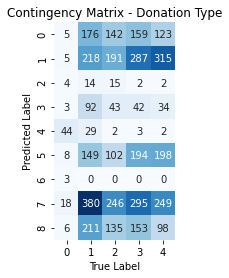

In [12]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(X_donation)

# Perform K-Means
km = KMeans(n_clusters=9)
km = km.fit(X_std)
labels_donation = km.predict(X_std)

# Scores
print('Homogeneity Score: ', homogeneity_score(y_donation, labels_donation))
print('V Measure Score: ', v_measure_score(y_donation, labels_donation))

# Contingency Matrix donation_type
cont_m_donation = cluster.contingency_matrix(y_donation, labels_donation)

sns.heatmap(cont_m_donation.T, square=True, annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label');
plt.title('Contingency Matrix - Donation Type')

### Hierarchical Clustering

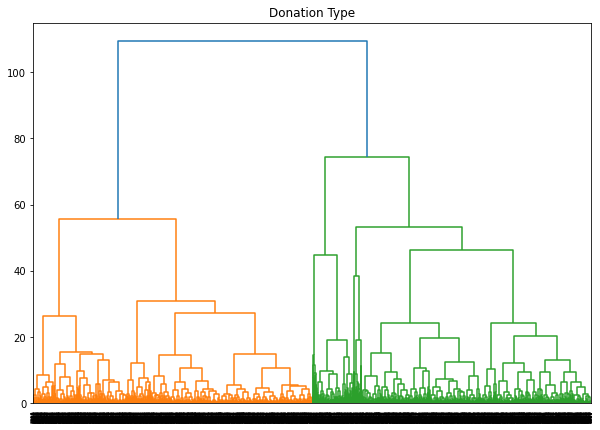

In [13]:
plt.figure(figsize=(10, 7))
plt.title('Donation Type')
dend = shc.dendrogram(shc.linkage(X_std, method='ward'))

In [14]:
# Perform Agglomerative Clustering
ag_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels_ac = ag_cluster.fit_predict(X_std)

Homogeneity Score:  0.018318072315088585
V Measure Score:  0.02479924404828882


Text(0.5, 1.0, 'Contingency Matrix - Donors vs. Not Donors')

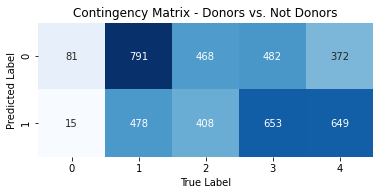

In [15]:
# Scores
print('Homogeneity Score: ', homogeneity_score(y_donation, labels_ac))
print('V Measure Score: ', v_measure_score(y_donation, labels_ac))

# Contingency Matrix
cont_m = cluster.contingency_matrix(y_donation, labels_ac)

sns.heatmap(cont_m.T, square=True, annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label');
plt.title('Contingency Matrix - Donors vs. Not Donors')

### Results and Discussion 

The results for this task were similar to Task 2.2. The slight increase in the results might point to the importance of the chosen features in the amount of donation given to charity. Curiously, even though we had more targets for Donation Type when compared to Donating, our Hierarchical Cluster dendrogram produced less clusters, two to be precise, showing the largest distance value is between 2 joining clusters. If the scores had been higher, it would have been interesting to inspect their content to find how they alone would separate donation types into clusters. Once again, we assume the bad results are due to deficient data pre-processing. On a different note, in both tasks K-means obtained better results than Hierachical Clustering and took less time to compute.